In [17]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# 1. Lê o arquivo e pega as dimensões 

In [2]:
# Transformando os dados
def juntaParMaquinaTempoExecução(vetor):
    resultado = []
    tamanho = len(vetor)
    i = 0
    while i < tamanho:
        resultado.append([vetor[i],vetor[i+1]])
        i = i + 2
    return resultado

def converteArrayEmMatriz(data):
    # Converte o array em uma matriz
    dadosFormatados = []
    for item in data:
        dadosFormatados.append(juntaParMaquinaTempoExecução(item.split()))
    return dadosFormatados

In [3]:
# Função de aptidão
def funcaoAptidao(posicaoCandidata, matrizOperacoesTempo):
    """
        Função para avaliar o desempenho do algoritmo
            Parâmetros:
                - posicaoCandidata: Vetor de N tarefas x M máquinas. Exemplo: [O11, 021,..]
                - matrizOperacoesTempo: Matriz N tarefas x M máquinas, onde cada posição é um array contendo a Máquina e seu Tempo. Exemplo: [['1', '20'], ['0', '15'],..]
    """
    numeroTarefas = len(matrizOperacoesTempo)
    numeroMaquinas = len(matrizOperacoesTempo[0])
    vetorTempoMaquinasEmExecucao = np.zeros(numeroMaquinas)
    vetorTarefasEmExecucao = np.zeros(numeroTarefas)
    # i[0] -> TAREFA
    # i[1] -> OPERACAO
    for i in posicaoCandidata:
        # print(i[0])
        # print(i[1])
        # print(matrizOperacoesTempo[int(i[0]) - 1 ][int(i[1]) - 1])
        maquina = int(matrizOperacoesTempo[int(i[0]) - 1 ][int(i[1]) - 1][0])
        tempoMaquina = int(matrizOperacoesTempo[int(i[0]) - 1][int(i[1]) - 1][1])
        tempoAtualAuxiliar = max(vetorTempoMaquinasEmExecucao[maquina - 1], vetorTarefasEmExecucao[int(i[0]) - 1])
        vetorTempoMaquinasEmExecucao[maquina - 1] = tempoAtualAuxiliar + tempoMaquina
        vetorTarefasEmExecucao[int(i[0]) - 1] = max(vetorTempoMaquinasEmExecucao[maquina - 1], vetorTarefasEmExecucao[int(i[0]) - 1])
    return [max(vetorTempoMaquinasEmExecucao), np.argmax(vetorTempoMaquinasEmExecucao) + 1]

In [ ]:
resultado = [50, 18, 3, 20, 49, 15, 42, 7, 24, 30, 9, 27, 1, 44, 34, 8, 2, 41, 37, 16, 21, 32, 46, 25, 38, 26, 43, 40, 12, 28, 35, 36, 47, 11, 22, 17, 13, 48, 6, 23, 10, 5, 45, 39, 19, 29, 14, 4, 31, 33]
[['6', '1'], ['2', '1'], ['1', '1'], ['3', '1'], ['5', '1'], ['2', '2'], ['5', '2'], ['1', '2'], ['3', '2'], ['4', '1'], ['1', '3'], ['3', '3'], ['1', '4'], ['5', '3'], ['4', '2'], ['1', '5'], ['1', '6']]

In [4]:
# Função de decoding
def decodeValoresReaisParaOperacoes(vetorValoresReais, numeroTarefas, numeroMaquinas):
    """
        Função para decodificar um array de valores reais em operações
            Parâmetros:
                - vetorValoresReais: Vetor com valores reais de dimensão N tarefas x M máquinas. Exemplo: [0.98, 0.11,..]
                - numeroTarefas: Número de tarefas do problema. 
                - numeroMaquinas: Número de máquinas do problema. 
    """
    # print(vetorValoresReais)
    vetorAuxiliarOrdenado = vetorValoresReais.copy()
    vetorAuxiliarOrdenado.sort()
    resultado = []
    matrizOperacoes = []
    for item in vetorValoresReais:
        resultado.append(list(vetorAuxiliarOrdenado).index(item) + 1)
    # print('resultado: {}'.format(resultado))
    countAux = np.ones(numeroTarefas)
    for item in resultado:
        contaArredondada = round((np.floor((item-1)/ numeroMaquinas)))
        matrizOperacoes.append([str(contaArredondada + 1), str(round(countAux[contaArredondada]))])
        countAux[contaArredondada] += 1
    return matrizOperacoes

In [5]:
# Função VND - Shift
def VND_shift(posicaoCandidata):
    """
        VND com estrutura de vizinhança Shift (Realoca a posição de uma operação numa mesma máquina)
            Parâmetros:
                - posicaoCandidata: Vetor com valores reais de dimensão N tarefas x M máquinas. Exemplo: [0.98, 0.11,..]
    """
    # print(posicaoCandidata)
    copiaPosicaoCandidata = posicaoCandidata.copy()
    [posicaoElementoASerDeslocado, posicaoFutura] = np.random.randint(1, len(copiaPosicaoCandidata), 2)
    # print(posicaoElementoASerDeslocado)
    # print(posicaoFutura)
    elementoASerDeslocado = copiaPosicaoCandidata[posicaoElementoASerDeslocado]
    del(copiaPosicaoCandidata[posicaoElementoASerDeslocado])
    primeiraParteVetor = copiaPosicaoCandidata[:posicaoFutura]
    segundaParteVetor = copiaPosicaoCandidata[posicaoFutura:]
    return primeiraParteVetor + [elementoASerDeslocado] + segundaParteVetor
    
# Função VND - Switch
def VND_switch(posicaoCandidata):
    """
        VND com estrutura de vizinhança Switch (Troca a posição de duas operações numa mesma máquina)
            Parâmetros:
                - posicaoCandidata: Vetor com valores reais de dimensão N tarefas x M máquinas. Exemplo: [0.98, 0.11,..]
    """
    # print(posicaoCandidata)
    copiaPosicaoCandidata = posicaoCandidata.copy()
    [primeiraPosicao, segundaPosicao] = np.random.randint(1, len(copiaPosicaoCandidata), 2)
    # print(primeiraPosicao)
    # print(segundaPosicao)
    primeiroElemento = copiaPosicaoCandidata[primeiraPosicao]
    copiaPosicaoCandidata[primeiraPosicao] = copiaPosicaoCandidata[segundaPosicao]
    copiaPosicaoCandidata[segundaPosicao] = primeiroElemento
    return copiaPosicaoCandidata

def VND_Swap(posicaoCandidata1, posicaoCandidata2):
    copiaPosicaoCandidata1 = posicaoCandidata1.copy()
    copiaPosicaoCandidata2 = posicaoCandidata2.copy()
    [primeiraPosicaoSorteada, segundaPosicaoSorteada] = np.random.randint(1, len(copiaPosicaoCandidata1), 2)
    elementoAuxiliar = copiaPosicaoCandidata1[primeiraPosicaoSorteada]
    copiaPosicaoCandidata1[primeiraPosicaoSorteada] = copiaPosicaoCandidata2[segundaPosicaoSorteada]
    copiaPosicaoCandidata2[segundaPosicaoSorteada] = elementoAuxiliar
    return [copiaPosicaoCandidata1, copiaPosicaoCandidata2]

# print('VND Switch')
# print(VND_switch(posicaoCandidataComValoresReais))

# print('')
# print('VND Shift')
# print(VND_shift(posicaoCandidataComValoresReais))
# print('')
# print('Antes 1: {} e 2: {}'.format(primeiraPosicaoCandidataComValoresReais, segundaPosicaoCandidataComValoresReais))
# print('VND Shift')
# print(VND_Swap(primeiraPosicaoCandidataComValoresReais, segundaPosicaoCandidataComValoresReais))

In [6]:
def particleSwarmOptimizationMethod(positionVector, velocityVector, bestPersonal, bestGlobal, c1, c2, w):
    """
        Particle Swarm Optimization Method
            Parameters:
            - positionVector: Array that contains real values with D positions
            - velocityVector: Array that contains real values with D positions
            - bestPersonal: Real values array from the best personal position evaluated
            - globalPersonal: Real values array from the global personal position evaluated
            - c1: Constant
            - c2: Constant
            - w: Constant
    """
    personalFunction = c1 * np.random.rand() * (bestPersonal - positionVector)
    globalFunction = c2 * np.random.rand() * (bestGlobal - positionVector)
    nextVelocityVector = w * velocityVector + personalFunction + globalFunction
    nextPositionVector = positionVector + nextVelocityVector
    return [nextPositionVector, nextVelocityVector]

In [7]:
def applyVNDMethod(VNDmethod, firstPositionVector, tasks, machines, referentialFitness, dadosFormatados, secondPositionVector = []):
    fitness = 9999999999
    i = 0
    while((fitness > referentialFitness) and (i <= max(tasks,machines))):
        if(secondPositionVector == []):
            resultedPositionVector = VNDmethod(list(firstPositionVector))
        else:
            resultedPositionVector = VNDmethod(list(firstPositionVector), list(secondPositionVector))
        operationsConverted = decodeValoresReaisParaOperacoes(resultedPositionVector, tasks, machines)
        fitness = funcaoAptidao(operationsConverted, dadosFormatados)[0]
        i = i + 1
        print('fitness: {} x referential: {}'.format(fitness, referentialFitness))

    print('saiu do while')
    if(i > max(tasks,machines)):
        return [referentialFitness, firstPositionVector]
    else:
        return [fitness, resultedPositionVector]

In [8]:
def compareFitnessAndReplaceOrNot(referentialFitness, currentFitness, currentVector, referentialVector):
    """
        Compare the currentFitness calculated and the referential fitness. If the currentFitness is smaller than the referential value, return current. If not, return the referential value.
    """
    if(currentFitness <= referentialFitness):
        return [currentFitness, currentVector]
    else:
        return [referentialFitness, referentialVector]

In [9]:
def readInstanceAndReturnDataTaskMachines(fileWithDirectory):
    """
        Read the instance file and return data, besides the number of tasks and machines for the instance.
    """
    # with open('./instances/la01.txt') as file:
    with open(fileWithDirectory) as file:
        lines = file.read()
        
    dimensions = lines.split('\n')[0]
    data = lines.split('\n')[1:]

    tasks = int(dimensions.split()[0])
    machines = int(dimensions.split()[1])
    print('Número de tasks: ', tasks)
    print('Número de máquinas: ', machines)
    return [data, tasks, machines]


In [10]:
# Format data and print
def formatReadData(data):
    """
        Format data to manipulate what is needed.
    """
    dadosFormatados = converteArrayEmMatriz(data)
    # print(dadosFormatados)

    # Printa para ver o resultado
    # for i in range(0, len(dadosFormatados)):
    #     print("Tarefa {}: {}".format(i+1, dadosFormatados[i]))

    # print("")
    # print("Exemplo para facilitar o entendimento")
    # print("Tarefa {}: {}".format(1, dadosFormatados[0]))
    # for i in range(0, len(dadosFormatados[0])):
    #     print("Tarefa {} -> Operação 1,{}: {} -> Máquina {} com tempo {}".format(i+1, i+1, dadosFormatados[0][i], dadosFormatados[0][i][0], dadosFormatados[0][i][1]))
    return dadosFormatados

In [4]:
# Dados mockados para teste
posicaoCandidataTeste = [['1','1'], ['3', '1'], ['2', '1'], ['3', '2'], ['1', '2'], ['2', '2'], ['3', '3'], ['2', '3'], ['1', '3']]
matrizOperacoesTempoTeste = [[['1', '2'], ['2', '3'], ['3', '1']], [['2', '3'], ['1', '1'], ['3', '2']], [['2', '2'], ['3', '3'], ['1', '2']]]

# Dados mockados para decoding
primeiraPosicaoCandidataComValoresReais = [0.13, 0.75, 0.48, 0.57, 0.21, 0.37, 0.96, 0.42, 0.06]
segundaPosicaoCandidataComValoresReais = [0.2, 0.8, 0.41, 0.21, 0.47, 0.9, 0.71, 0.13, 0.06]

In [11]:
def initializePositionAndVelocityArrays(numberOfParticles, dimension):
    positionMatrix = np.zeros((numberOfParticles, dimension))
    velocityMatrix = np.zeros((numberOfParticles, dimension))
    for i in range(0, numberOfParticles):
        positionMatrix[i] = np.random.rand(dimension)
        velocityMatrix[i] = np.random.randn(dimension)
    return [positionMatrix, velocityMatrix]

In [12]:
def generateRandomIterationNumber(numberOfIterations):
    return np.random.randint(numberOfIterations)

In [13]:
def initializeBestPersonalAndGlobalPositionVector(positionMatrix, velocityMatrix, numberOfParticles, tasks, machines, dadosFormatados):
    # Set  
    positionMatrixAux = positionMatrix.copy()
    velocityMatrixAux = velocityMatrix.copy()

    # Initialize vectors
    bestPersonalPositionVector = np.zeros((numberOfParticles, tasks*machines))
    bestPersonalFitness = np.zeros(numberOfParticles)

    # Set initial values of vectors
    for i in range(0, numberOfParticles):
        bestPersonalPositionVector[i] = positionMatrixAux[i].copy()
        # print(bestPersonalPositionVector[i])
        decodedArray = decodeValoresReaisParaOperacoes(bestPersonalPositionVector[i], tasks, machines)
        # print(decodedArray)
        bestPersonalFitness[i] = funcaoAptidao(decodedArray, dadosFormatados)[0]

    # print('bestPersonalFitness: {}'.format(bestPersonalFitness))
    # Find the best fitness value (the smallest value)
    indexOfBetterFitness = np.argmin(bestPersonalFitness)
    # print('indexOfBetterFitness: {}'.format(indexOfBetterFitness))
    # valueBetterFitness = np.min(bestPersonalFitness)
    # print(bestPersonalFitness)
    bestGlobalPositionVector = positionMatrixAux[indexOfBetterFitness].copy()
    # print('positionMatrixAux: {}'.format(positionMatrixAux))
    # print('bestGlobalPositionVector: {}'.format(bestGlobalPositionVector))

    decodedArray = decodeValoresReaisParaOperacoes(bestGlobalPositionVector, tasks, machines)
    bestGlobalFitness = funcaoAptidao(decodedArray, dadosFormatados)[0]

    print('initial bestGlobalPosition {}'.format(bestGlobalPositionVector))
    print('initial bestGlobalFitness {}'.format(bestGlobalFitness))
    return [bestPersonalPositionVector, bestPersonalFitness, bestGlobalPositionVector, bestGlobalFitness, positionMatrixAux, velocityMatrixAux]



In [28]:
numberOfParticles = 60
c1 = 2
c2 = 2
w = 1
# Number of iterations
iterations = 100

# Full Method
[data, tasks, machines] = readInstanceAndReturnDataTaskMachines('./instances/la02.txt')
dadosFormatados = formatReadData(data)
[positionMatrix, velocityMatrix] = initializePositionAndVelocityArrays(numberOfParticles, tasks*machines)
[bestPersonalPositionVector, bestPersonalFitness, bestGlobalPositionVector, bestGlobalFitness, positionMatrixAux, velocityMatrixAux] = initializeBestPersonalAndGlobalPositionVector(positionMatrix, velocityMatrix, numberOfParticles, tasks, machines, dadosFormatados)


Número de tasks:  10
Número de máquinas:  5
initial bestGlobalPosition [0.15895912 0.99957543 0.45361836 0.65446222 0.12109469 0.98424644
 0.84010792 0.58433024 0.10529464 0.04827603 0.36172363 0.58094662
 0.12411839 0.70845884 0.35234214 0.52937024 0.91714911 0.60884078
 0.90597685 0.93618914 0.09117839 0.94075425 0.63285099 0.42374657
 0.3441004  0.02545395 0.51277133 0.05653463 0.25768854 0.65177761
 0.12194419 0.79684241 0.19804758 0.23453174 0.58563835 0.53559796
 0.68565357 0.99530912 0.84231447 0.91845053 0.59917857 0.53233695
 0.29884499 0.72061378 0.62812407 0.6831072  0.77106072 0.02334864
 0.73226015 0.35517419]
initial bestGlobalFitness 828.0


In [142]:
operationsConverted = decodeValoresReaisParaOperacoes(bestGlobalPositionVector, tasks, machines)
oldBestGlobalFitness = funcaoAptidao(operationsConverted, dadosFormatados)[0]
oldBestGlobalFitness

1182.0

In [29]:

iterationChoosen = generateRandomIterationNumber(iterations)
print('iterationChoosen {}'.format(iterationChoosen))
print('bestGlobalFitness {}'.format(bestGlobalFitness))

bestGlobalFitnessArray = np.zeros(iterations)

# Method Proposed
for it in range(0, iterations):
    # print('Iteração {}'.format(it))
    for amostra in range(0, numberOfParticles):

        # print('Amostra {}'.format(amostra))
        # Apply VND if the iteration is the drawn
        if(it == iterationChoosen):
            # For the first VND Method
            [fitness, newPositionVector] = applyVNDMethod(VND_shift, positionMatrixAux[amostra], tasks, machines, bestPersonalFitness[amostra], dadosFormatados)
            # Update the value
            bestPersonalFitness[amostra] = compareFitnessAndReplaceOrNot(bestPersonalFitness[amostra], fitness, newPositionVector, bestPersonalPositionVector[amostra])[0]

            # For the second VND Method
            [fitness, newPositionVector] = applyVNDMethod(VND_switch, newPositionVector, tasks, machines, bestPersonalFitness[amostra], dadosFormatados)
            bestPersonalFitness[amostra] = compareFitnessAndReplaceOrNot(bestPersonalFitness[amostra], fitness, newPositionVector, bestPersonalPositionVector[amostra])[0]

        # Run PSO
        [newPositionVector, newVelocityVector] = particleSwarmOptimizationMethod(positionMatrixAux[amostra], velocityMatrixAux[amostra], bestPersonalPositionVector[amostra], bestGlobalPositionVector, c1, c2, w)

        operationsConverted = decodeValoresReaisParaOperacoes(bestGlobalPositionVector, tasks, machines)
        oldBestGlobalFitness = funcaoAptidao(operationsConverted, dadosFormatados)[0]
        
        # Apply decoding funtion to convert real array numbers to operations array
        operationsConverted = decodeValoresReaisParaOperacoes(newPositionVector, tasks, machines)
        # Evaluate the fitness from operations array found
        [fitness, finalMachine] = funcaoAptidao(operationsConverted, dadosFormatados)

        # Compare values to update the best fitness
        [bestPersonalFitness[amostra], bestPersonalPositionVector[amostra]] = compareFitnessAndReplaceOrNot(bestPersonalFitness[amostra], fitness, newPositionVector, bestPersonalPositionVector[amostra])
        # print('bestPersonalFitness[amostra] {}'.format(bestPersonalFitness[amostra]))
        # Update the values
        positionMatrixAux[amostra] = newPositionVector.copy()
        velocityMatrixAux[amostra] = newVelocityVector.copy()
    
    indexOfBestPersonalFitness = np.argmin(bestPersonalFitness)
    smallestPersonalFitness = np.min(bestPersonalFitness)
    # print('bestPersonalFitness {}'.format(bestPersonalFitness))
    # print('indexOfBestPersonalFitness {}'.format(indexOfBestPersonalFitness))
    # print('positionMatrixAux {}'.format(positionMatrixAux))
    # print('smallestPersonalFitness {}'.format(smallestPersonalFitness))
    currentBestGlobalPositionVector = positionMatrixAux[indexOfBestPersonalFitness].copy()


    operationsConverted = decodeValoresReaisParaOperacoes(bestGlobalPositionVector, tasks, machines)
    oldBestGlobalFitness = funcaoAptidao(operationsConverted, dadosFormatados)[0]
    # print('oldBestGlobalFitness: {}'.format(oldBestGlobalFitness))
    
    if(smallestPersonalFitness < oldBestGlobalFitness):
        bestGlobalPositionVector = currentBestGlobalPositionVector.copy()
    operationsConverted = decodeValoresReaisParaOperacoes(bestGlobalPositionVector, tasks, machines)
    bestGlobalFitnessArray[it] = funcaoAptidao(operationsConverted, dadosFormatados)[0]
    # print('bestGlobalPositionVector: {}'.format(bestGlobalPositionVector))
    print('new bestGlobalPositionVector: {}'.format(bestGlobalFitnessArray[it]))
    print('')

# operationsConverted = decodeValoresReaisParaOperacoes(bestGlobalPositionVector, tasks, machines)
# [fitness, finalMachine] = funcaoAptidao(operationsConverted, dadosFormatados)


iterationChoosen 88
bestGlobalFitness 828.0
new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 828.0

new bestGlobalPositionVector: 818.0

new bestGlobalPositionVector: 818.0

new bestGlobalPositionVector: 808.0

new bestGlobalPositionVector: 808.0

new bestGlobalPositionVector: 808.0

new bestGlobalPositionVector: 803.0

new bestGlobalPositionVector: 782.0

new bestGlobalPositionVector: 782.0

new bestGlobalPositionVector: 782.0

new bestGlobalPositionVector: 782.0

new bestGlobalPositionVector: 746.0

new bestGlobalPositionVector: 746.0

new bestGlobalPositionVector: 7

## Plotando as informações

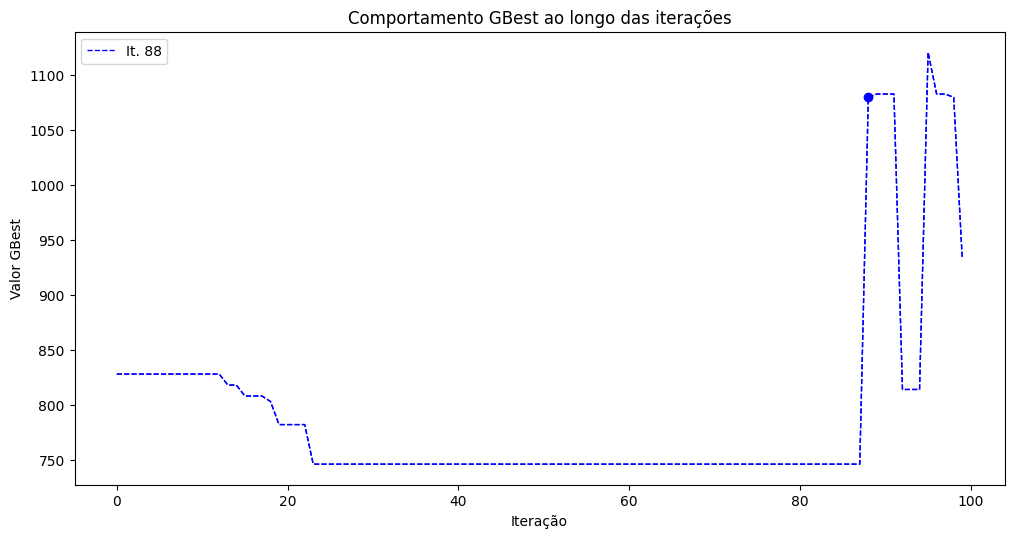

In [38]:
x = np.arange(iterations)
y = bestGlobalFitnessArray

fig, axes = plt.subplots(figsize=(12,6), dpi=100)

axes.plot(x, y, color='blue', lw=1, ls='--', label="It. {}".format(iterationChoosen)) # 'r' é a cor vermelha (red)
axes.plot(x, y, color='blue', lw=1, ls='--', marker='o', markevery=[iterationChoosen])
axes.set_xlabel('Iteração')
axes.set_ylabel('Valor GBest')
axes.set_title('Comportamento GBest ao longo das iterações')
axes.legend()